## 1.- Download and save the text 

In [1]:
import requests

url = "https://www.gutenberg.org/cache/epub/1581/pg1581.txt"
response = requests.get(url)

if response.status_code == 200:
    with open("Douay-Rheims.txt", "w",encoding="utf-8") as file:
        file.write(response.text,)
    print("File downloaded successfully!")
else:
    print("Failed to download file. Status code:", response.status_code)

File downloaded successfully!


## 2. Parsing 

In this section we parese the bible in chapter and verses.
The logic is simple, we find all the chapter titles using regular expressions, and we use that to split. 
There are foot notes and annotations, particularly in the end, however we are only interested in Bible verses, so after we split by \n\n\n\n, we only keep those lines that start wit \d+:\d+ i.e chapter and verse like 12:5 etc. 


In [2]:
import re
# Sample text
with open('Douay-Rheims.txt', 'r',encoding="utf-8") as f:
    text = f.read()
expression = re.compile(r"(?=^.+Chapter \d+)", re.MULTILINE)
chapters = re.split(expression,text)

In [3]:
# Find all the chapters
expression = re.compile(r"^.+Chapter \d+", re.MULTILINE)
chapter_names =re.findall(expression,text)


In [30]:
# Split the bible in chapters
expression = re.compile(r"(?=^.+Chapter \d+)", re.MULTILINE)
chapters = re.split(expression,text)

bible_dict = {}
# Split the chapters in verses
verses_regex = re.compile(r"\n\n\n\n", re.MULTILINE)
verse_number_regex = re.compile(r"^\d+:\d+\. ", re.MULTILINE)


from collections import namedtuple
Verse = namedtuple('Verse', ['book','chapter', 'verse', 'text'])
verse_number_regex = re.compile(r"^\d+:\d+\. ", re.MULTILINE)


def separate_verse_num(x,c):
    m= re.findall(verse_number_regex,x)
    vn = re.sub(r"\. ",r"",m[0]).split(":")
    text = re.sub(verse_number_regex,r"",x)
    book_name = re.sub(r' Chapter \d+.*',r'',c)
    return Verse(book=book_name ,chapter=vn[0],verse=vn[1],text=text)

n = len(chapter_names)
for c in range(n):
   chapter_dict = { chapter_names[c]: [separate_verse_num(x,chapter_names[c]) for x in re.split(verses_regex,chapters[c+1]) if re.match(r"(?=^\d+:\d+\. )",x)]}
   bible_dict.update(chapter_dict)


In [5]:
len(chapter_names)

1334

As a sanity check, we review that Apocalypse Chapter 22 looks nice. It is the last book and wanted to double chech that all versers are there and no extranues notes are present

In [32]:
for v in bible_dict['Apocalypse Chapter 22']:
    print(v.book,v.chapter,":",v.verse,"::",v.text)

Apocalypse 22 : 1 :: And he shewed me a river of water of life, clear as crystal,

proceeding from the throne of God and of the Lamb.
Apocalypse 22 : 2 :: In the midst of the street thereof, and on both sides of the

river, was the tree of life, bearing twelve fruits, yielding its fruits

every month: and the leaves of the tree for the healing of the nations.
Apocalypse 22 : 3 :: And there shall be no curse any more: but the throne of God and

of the Lamb shall be in it. And his servants shall serve him.
Apocalypse 22 : 4 :: And they shall see his face: and his name shall be on their

foreheads.
Apocalypse 22 : 5 :: And night shall be no more. And they shall not need the light of

the lamp, nor the light of the sun, because the Lord God shall

enlighten them. And they shall reign for ever and ever.
Apocalypse 22 : 6 :: And he said to me: These words are most faithful and true. And

the Lord God of the spirits of the prophets sent his angel to shew his

servants the things which must be

In [7]:
#!pip install -U sentence-transformers

In [153]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('msmarco-distilbert-cos-v5')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/5.17k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/545 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/319 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Now, we embedd all the verses across all chapters

In [154]:
import time 
bible_embeddings = dict( z for z in zip(chapter_names, [None]*len(chapter_names)))

n = 1 
m = len(chapter_names)
for c in chapter_names:
    start = time.time()
    bible_embeddings[c] =[model.encode(verse.text) for verse in bible_dict[c]]
    end = time.time()
    print(f"encoding {c}, {n} of {m}, time taken {(end-start):.2f} seconds ")
    n = n+1

encoding Genesis Chapter 1, 1 of 1334, time taken 1.38 seconds 
encoding Genesis Chapter 2, 2 of 1334, time taken 0.67 seconds 
encoding Genesis Chapter 3, 3 of 1334, time taken 0.63 seconds 
encoding Genesis Chapter 4, 4 of 1334, time taken 0.65 seconds 
encoding Genesis Chapter 5, 5 of 1334, time taken 0.69 seconds 
encoding Genesis Chapter 6, 6 of 1334, time taken 0.53 seconds 
encoding Genesis Chapter 7, 7 of 1334, time taken 0.57 seconds 
encoding Genesis Chapter 8, 8 of 1334, time taken 0.53 seconds 
encoding Genesis Chapter 9, 9 of 1334, time taken 0.67 seconds 
encoding Genesis Chapter 10, 10 of 1334, time taken 0.73 seconds 
encoding Genesis Chapter 11, 11 of 1334, time taken 0.76 seconds 
encoding Genesis Chapter 12, 12 of 1334, time taken 0.49 seconds 
encoding Genesis Chapter 13, 13 of 1334, time taken 0.44 seconds 
encoding Genesis Chapter 14, 14 of 1334, time taken 0.62 seconds 
encoding Genesis Chapter 15, 15 of 1334, time taken 0.51 seconds 
encoding Genesis Chapter 16,

In [12]:
import pickle
#with open('data/bible_dict.pkl', 'wb') as file:
#    # Dump the object to the file
#    pickle.dump(bible_dict, file)
#with open('data/bible_embeddings.pkl', 'wb') as file:
#    # Dump the object to the file
#    pickle.dump(bible_embeddings, file)

In [155]:
# Create a Matrix
matrix = []

for c in chapter_names:
        for v in bible_embeddings[c]:
            matrix.append(v)


In [156]:
import numpy as np
matrix = np.array(matrix)

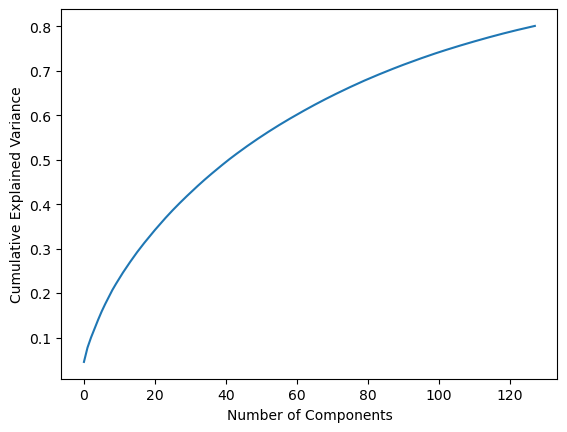

In [268]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Step 1: Convert list of NumPy arrays to a 2D matrix (e.g., a matrix with shape (n_samples, n_features))
X = matrix

# Step 2: Standardize the data (important for PCA)
X_scaled = normalize(X)

# Step 3: Apply PCA to reduce dimensionality
pca = PCA(n_components=0.80)  
X_pca = pca.fit_transform(X_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


## Elbow Method, selecting number of Clusters

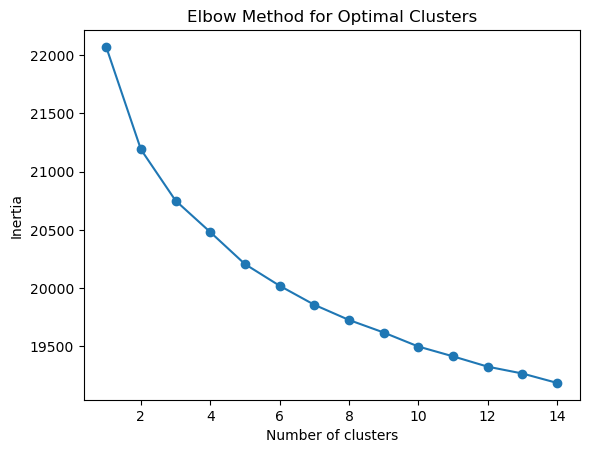

In [270]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate inertia for different numbers of clusters
inertia = []
for k in range(1, 15):  # Try from 1 to 10 clusters
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Plot inertia to find the "elbow"
plt.plot(range(1, 15), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## Clustering 

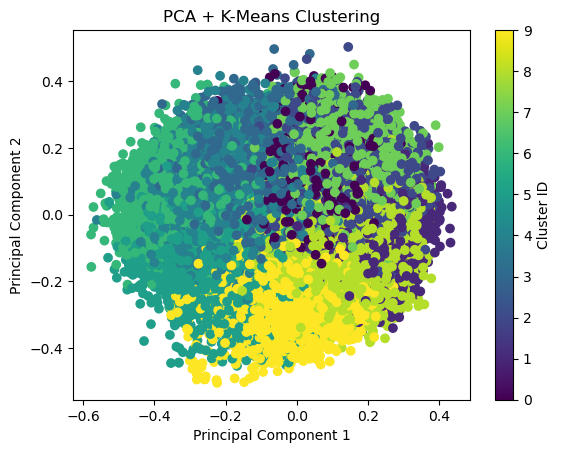

Cluster Centers (in PCA space):
[[ 7.2283849e-02  9.2476487e-02  1.1316798e-01 ...  1.4555879e-03
  -1.3364688e-03 -8.1138882e-05]
 [ 1.7256327e-01 -5.0284375e-02  9.8382384e-03 ...  5.0294178e-04
   7.8710954e-04  2.5305361e-03]
 [ 1.3076498e-01  9.3242034e-02 -8.3954982e-02 ... -2.0501441e-03
   1.3455322e-03 -4.2235726e-04]
 ...
 [ 1.4192310e-01  1.1259473e-01 -1.6555026e-02 ... -1.6765193e-03
   6.7437184e-04  8.7540591e-04]
 [ 1.3991584e-01 -9.7565733e-02 -7.8597896e-02 ...  7.9579302e-04
  -2.7463816e-03 -1.7952628e-03]
 [-1.0582170e-02 -2.1838360e-01  3.8587138e-02 ...  4.2259169e-04
   1.1062013e-03  3.4062483e-04]]


In [271]:
# Step 4: Apply Clustering 
kmeans = KMeans(n_clusters=10)  
kmeans.fit(X_pca)

# Step 5: Visualize the result 
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title("PCA + K-Means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster ID")
plt.show()

# Step 6: Optionally, print cluster centers
print("Cluster Centers (in PCA space):")
print(kmeans.cluster_centers_)

In [272]:
import pandas as pd
labels = {'labels':kmeans.labels_,}
labels = pd.DataFrame(labels)
labels.groupby('labels').size()

labels
0    3251
1    4036
2    3690
3    2734
4    4152
5    3828
6    2495
7    3816
8    3829
9    3928
dtype: int64

In [273]:
array_text = []
array_book = []
for c in chapter_names:
        for v in bible_dict[c]:
            array_text.append(v.text)
            array_book.append(v.book)
df_text = pd.DataFrame({'text':array_text, 'book':array_book})
df_text['cluster'] =kmeans.labels_
df_text.head()

text     book  cluster
0    In the beginning God created heaven, and earth.  Genesis        3
1  And the earth was void and empty, and darkness...  Genesis        0
2   And God said: Be light made. And light was made.  Genesis        9
3  And God saw the light that it was good; and he...  Genesis        5
4  And he called the light Day, and the darkness ...  Genesis        3

Cluster 0 


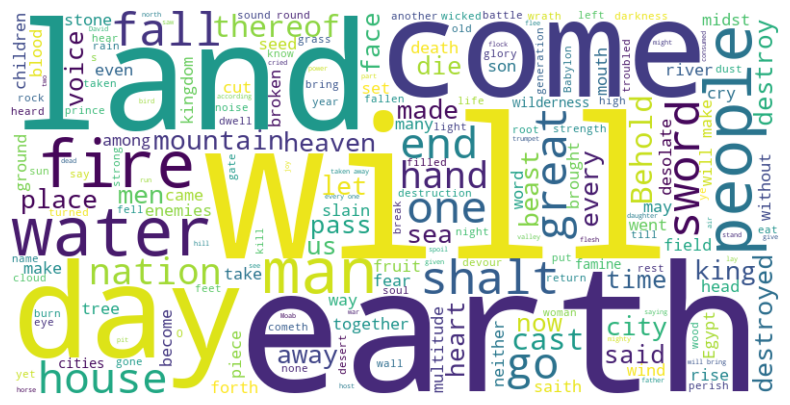

Cluster 1 


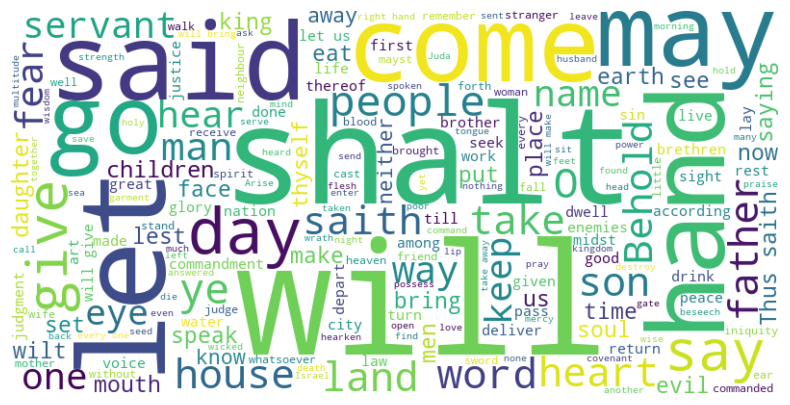

Cluster 2 


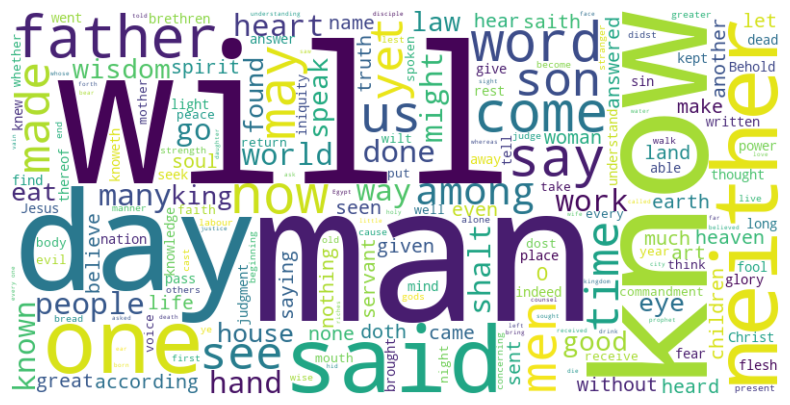

Cluster 3 


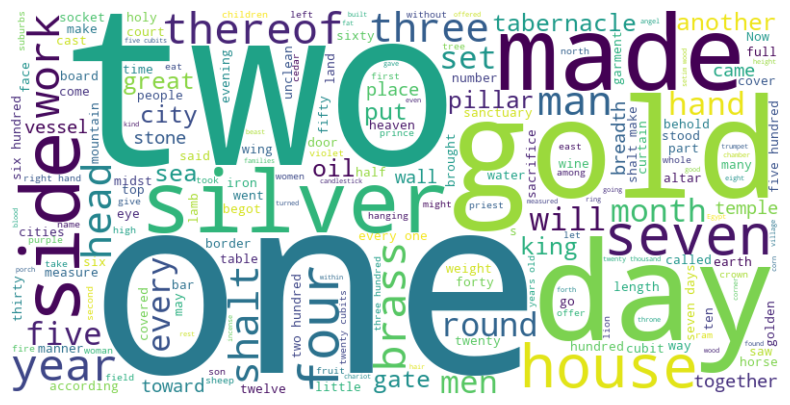

Cluster 4 


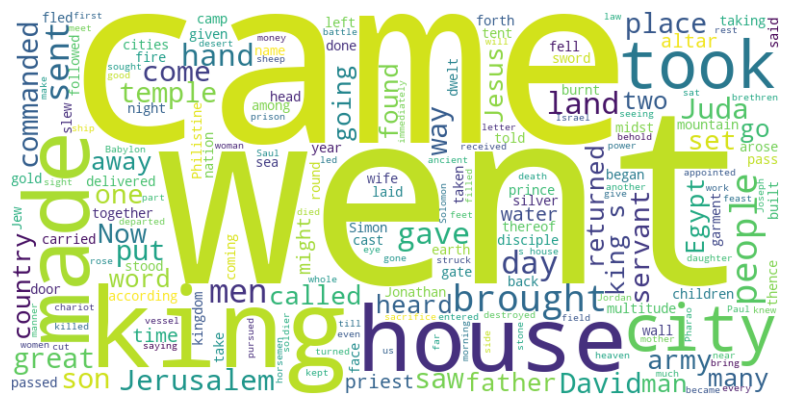

Cluster 5 


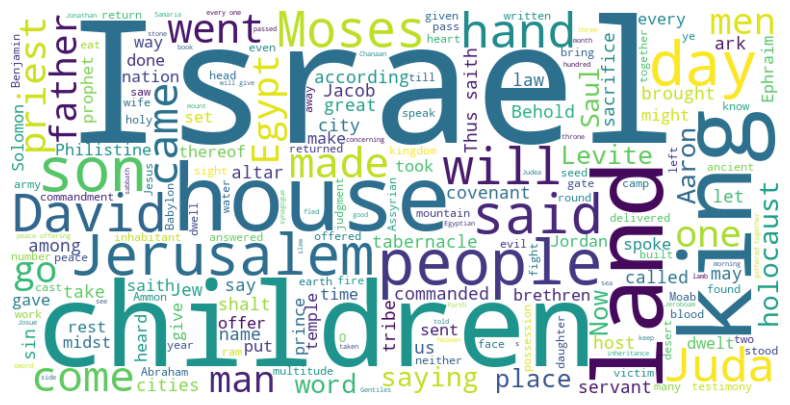

Cluster 6 


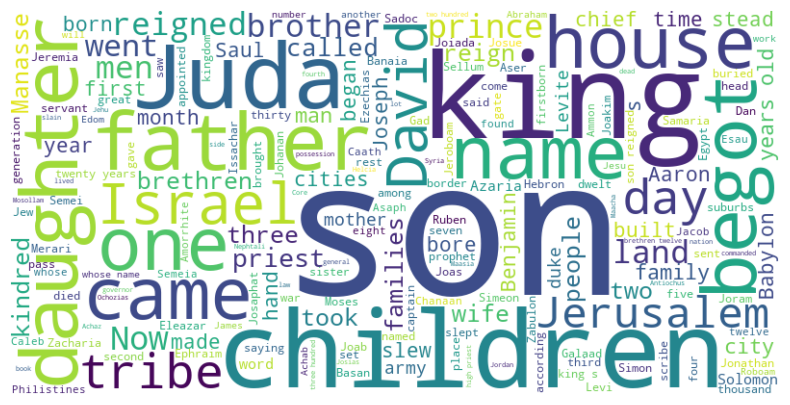

Cluster 7 


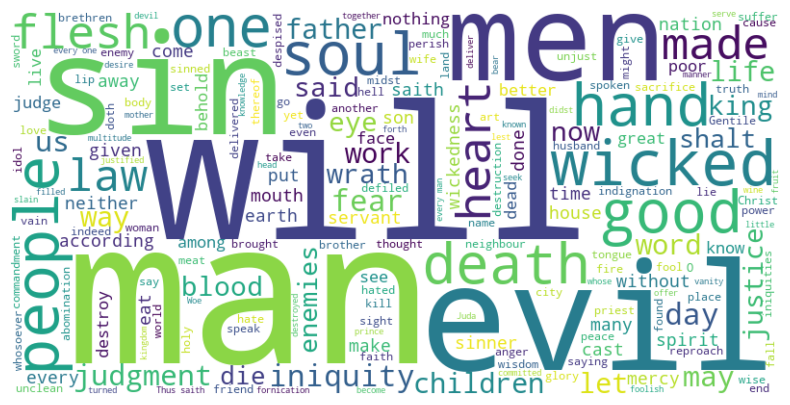

Cluster 8 


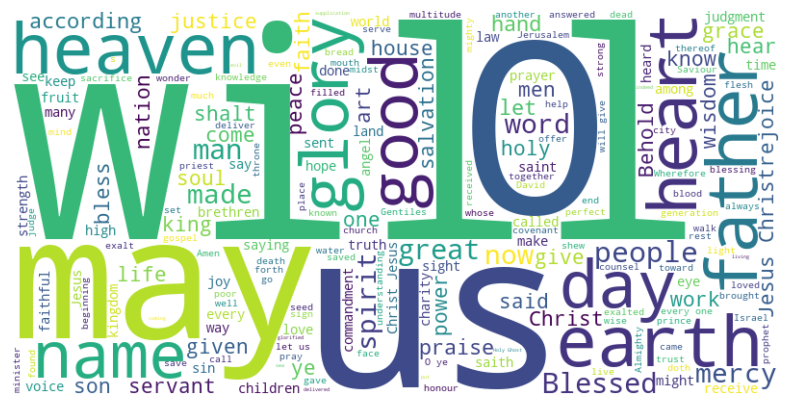

Cluster 9 


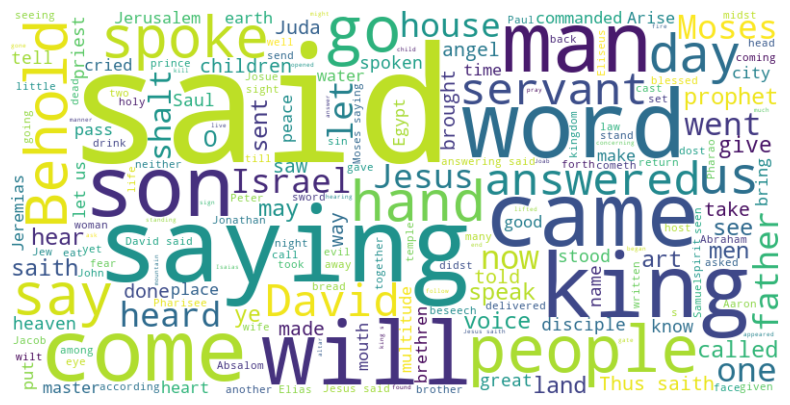

In [274]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
stopwords.update(["thy", "thou","thee", "Lord","God","thing","hath","things","hast","upon","unto"]) # Extremely common in the source material

for i in range(10):
    txt = '\n'.join(df_text.loc[df_text['cluster']==i]['text'])
    # Generate the word cloud
    wordcloud = WordCloud(
        width=800, height=400, 
        background_color='white', 
        stopwords = stopwords,
        colormap='viridis'
    ).generate(txt)
    print (f"Cluster {i} ")
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # No axes
    plt.show()

## Cluster Composition by Book in the Bible

We want to visualize the proportion of verses in the different clusters across each book.

In [275]:
#First we group the verses by cluster and book
books_clusters = df_text.groupby(['book','cluster'],as_index=False).size()
books_clusters.head()

book  cluster  size
0  1 Corinthians        0    23
1  1 Corinthians        1    41
2  1 Corinthians        2   181
3  1 Corinthians        3    15
4  1 Corinthians        4     9

In [276]:
books = df_text['book'].unique()
print(books)
print(len(books))

['Genesis' 'Exodus' 'Leviticus' 'Numbers' 'Deuteronomy' 'Josue' 'Judges'
 'Ruth' '1 Kings' '2 Kings' '3 Kings' '4 Kings' '1 Paralipomenon'
 '2 Paralipomenon' '1 Esdras' '2 Esdras' 'Tobias' 'Judith' 'Esther' 'Job'
 'Psalms' 'Proverbs' 'Ecclesiastes' 'Canticle of Canticles' 'Wisdom'
 'Ecclesiasticus' 'Isaias' 'Jeremias' 'Lamentations' 'Baruch' 'Ezechiel'
 'Daniel' 'Osee' 'Joel' 'Amos' 'Abdias' 'Jonas' 'Micheas' 'Nahum'
 'Habacuc' 'Sophonias' 'Aggeus' 'Zacharias' 'Malachias' '1 Machabees'
 '2 Machabees' 'Matthew' 'Mark' 'Luke' 'John' 'Acts' 'Romans'
 '1 Corinthians' '2 Corinthians' 'Galatians' 'Ephesians' 'Philippians'
 'Colossians' '1 Thessalonians' '2 Thessalonians' '1 Timothy' '2 Timothy'
 'Titus' 'Philemon' 'Hebrews' 'James' '1 Peter' '2 Peter' '1 John'
 '2 John' '3 John' 'Jude' 'Apocalypse']
73


In [277]:
# We need to reformat our datafame to allow the desired visualization
new_books_clusters ={'book':books,0:[0]*len(books),1:[0]*73,2:[0]*73,3:[0]*73,4:[0]*73,5:[0]*73,6:[0]*73,7:[0]*73,8:[0]*73,9:[0]*73}
new_books_clusters = pd.DataFrame(new_books_clusters)
for i in range(books_clusters.shape[0]):
    new_books_clusters.loc[new_books_clusters['book']==books_clusters.loc[i,'book'],books_clusters.loc[i,'cluster']]=books_clusters.loc[i,'size']

new_books_clusters.head()

book    0    1    2    3    4    5    6    7    8    9
0      Genesis   84  172  116  151  306  125  205   39   75  257
1       Exodus   80  142   49  313   78  250   36   62   44  157
2    Leviticus   86   98   58  151   39  144    4  170   56   52
3      Numbers   77   74   43  218  100  333  201   64   32  146
4  Deuteronomy  105  288   89   65   41   92   17   98  100   64

In [279]:
#Now, we divide by the total number of verses to get percentages 
for i in range(new_books_clusters.shape[0]):
    s=0.0
    for j in range(10):
        s=s+new_books_clusters.loc[i,j]
    for j in range(10):
        new_books_clusters.loc[i,j]=new_books_clusters.loc[i,j]/s
new_books_clusters.head()

book         0         1         2         3         4         5  \
0      Genesis  0.054902  0.112418  0.075817  0.098693  0.200000  0.081699   
1       Exodus  0.066061  0.117258  0.040462  0.258464  0.064410  0.206441   
2    Leviticus  0.100233  0.114219  0.067599  0.175991  0.045455  0.167832   
3      Numbers  0.059783  0.057453  0.033385  0.169255  0.077640  0.258540   
4  Deuteronomy  0.109489  0.300313  0.092805  0.067779  0.042753  0.095933   

          6         7         8         9  
0  0.133987  0.025490  0.049020  0.167974  
1  0.029727  0.051197  0.036334  0.129645  
2  0.004662  0.198135  0.065268  0.060606  
3  0.156056  0.049689  0.024845  0.113354  
4  0.017727  0.102190  0.104275  0.066736

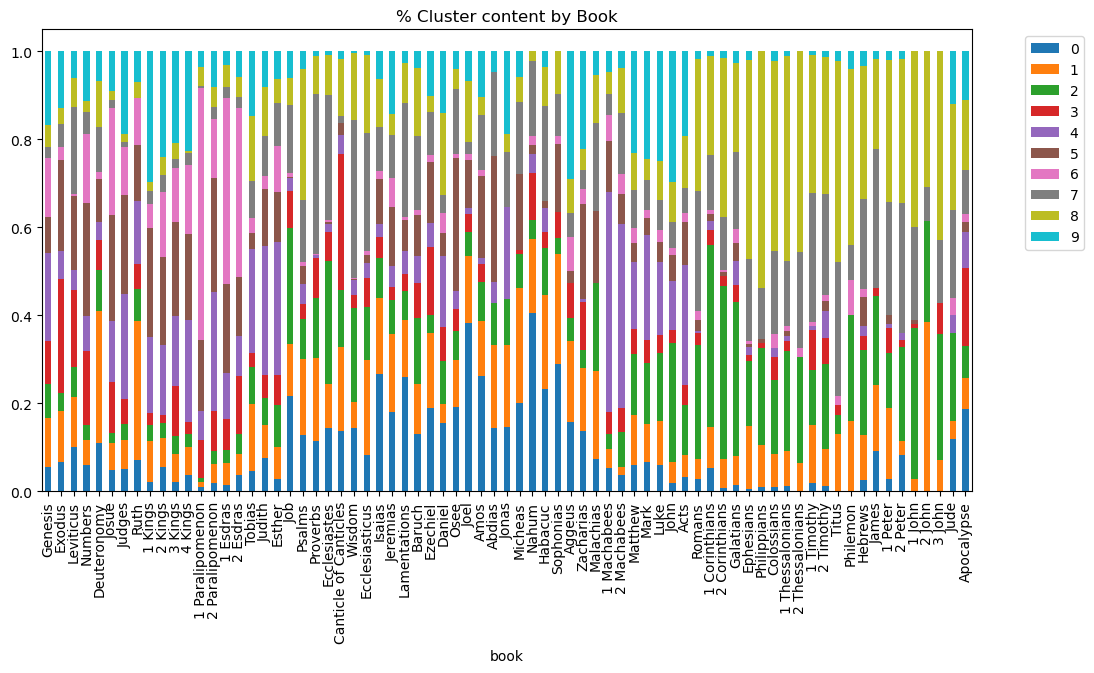

In [280]:
ax = new_books_clusters.plot(x='book', kind='bar', stacked=True,
        title='% Cluster content by Book',figsize=(12, 6))


ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [285]:
result = df_text.loc[(df_text['cluster']==2) & (df_text['book']=='Genesis'),'text']

for x in result:
    print("__________________________________________________")
    print(x)

__________________________________________________
But of the tree of knowledge of good and evil, thou shalt not

eat. For in what day soever thou shalt eat of it, thou shalt die the

death.
__________________________________________________
And the Lord God said: It is not good for man to be alone: let us

make him a help like unto himself.
__________________________________________________
And they were both naked: to wit, Adam and his wife: and were not

ashamed.
__________________________________________________
Now the serpent was more subtle than any of the beasts of the

earth which the Lord God had made. And he said to the woman: Why hath

God commanded you, that you should not eat of every tree of paradise?
__________________________________________________
But of the fruit of the tree which is in the midst of paradise,

God hath commanded us that we should not eat; and that we should not

touch it, lest perhaps we die.
__________________________________________________
If tho

## Latent Dirichlet Allocation

In [210]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the data
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_text['text'])

# Create and fit the LDA model
lda = LatentDirichletAllocation(n_components=10, random_state=42) 
lda.fit(X)

# Print top words per topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))

# Assign topics to documents
doc_topic_dist = lda.transform(X)

Topic 0:
shall offer lord altar sin eat blood sacrifice offered holocaust
Topic 1:
shall thereof gold cubits house tree lord shalt thou set
Topic 2:
son sons children shall tribe lord israel day levites cities
Topic 3:
shall man written book hath woman kings words acts pharisees
Topic 4:
lord king said saying came israel moses went david spoke
Topic 5:
god shall lord christ jesus things hath man unto thy
Topic 6:
shall men thousand sword city children army israel lord went
Topic 7:
shall son years old gold silver man sons linen oil
Topic 8:
thou thy thee shall lord god shalt hast said hath
Topic 9:
years wife begot son man daughter said shall mother father


## Other Approaches: UMAP for dimentionality reduction and OPTICS/DBSCAN for clustering

I tried other approaches like using UMAP instead of PCA and OPTICS/DBSCAN instead of knn, however the results were poor. 

In [211]:
import umap.umap_ as umap

In [212]:
reducer = umap.UMAP()
scaled_data = StandardScaler().fit_transform(X_pca)
embedding = reducer.fit_transform(scaled_data)
embedding.shape


(35759, 2)

In [213]:
embedding[:5,:]

array([[ 6.6051316,  9.836084 ],
       [ 9.286385 , 11.030214 ],
       [ 6.971168 ,  9.915435 ],
       [11.047721 ,  8.451101 ],
       [12.921363 , 10.486983 ]], dtype=float32)

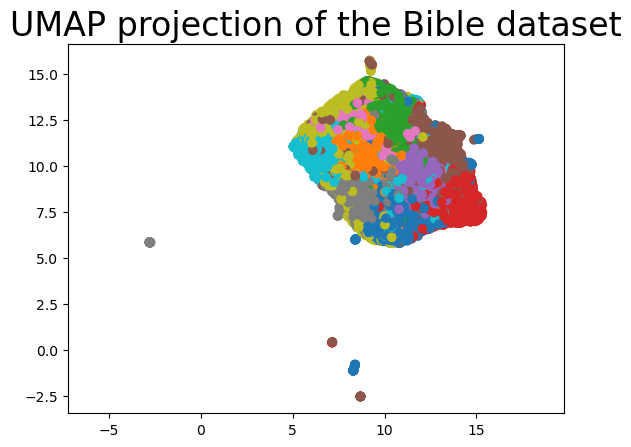

In [214]:
import seaborn as sns
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df_text['cluster']])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Bible dataset', fontsize=24);

In [215]:
from sklearn.cluster import OPTICS
import numpy as np
clustering = OPTICS(min_samples=5).fit(X_pca)
dbscan_labels = clustering.labels_

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:1083: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


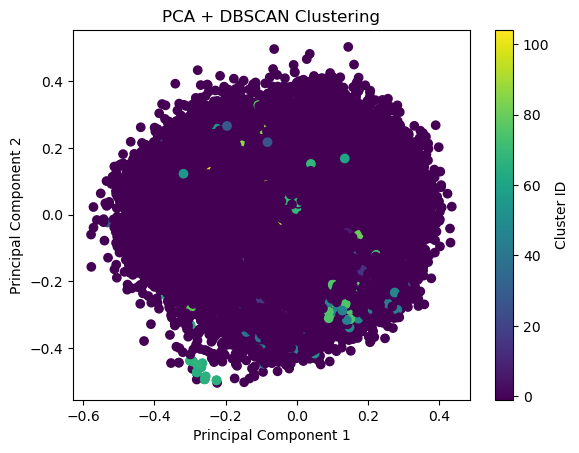

In [216]:
# Plot the result
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis')
plt.title("PCA + DBSCAN Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster ID")
plt.show()

In [217]:
import pandas as pd
labels = {'labels':dbscan_labels}
labels = pd.DataFrame(labels)
labels.groupby('labels').size()

labels
-1      34912
 0         10
 1          5
 2          6
 3          6
        ...  
 100        6
 101        7
 102        6
 103        6
 104       14
Length: 106, dtype: int64

In [218]:
books_clusters = df_text.groupby(['book','cluster'],as_index=False).size()

In [219]:
books_clusters.head()

book  cluster  size
0  1 Corinthians        0     6
1  1 Corinthians        1   152
2  1 Corinthians        2    43
3  1 Corinthians        3     3
4  1 Corinthians        4     5

['Genesis' 'Exodus' 'Leviticus' 'Numbers' 'Deuteronomy' 'Josue' 'Judges'
 'Ruth' '1 Kings' '2 Kings' '3 Kings' '4 Kings' '1 Paralipomenon'
 '2 Paralipomenon' '1 Esdras' '2 Esdras' 'Tobias' 'Judith' 'Esther' 'Job'
 'Psalms' 'Proverbs' 'Ecclesiastes' 'Canticle of Canticles' 'Wisdom'
 'Ecclesiasticus' 'Isaias' 'Jeremias' 'Lamentations' 'Baruch' 'Ezechiel'
 'Daniel' 'Osee' 'Joel' 'Amos' 'Abdias' 'Jonas' 'Micheas' 'Nahum'
 'Habacuc' 'Sophonias' 'Aggeus' 'Zacharias' 'Malachias' '1 Machabees'
 '2 Machabees' 'Matthew' 'Mark' 'Luke' 'John' 'Acts' 'Romans'
 '1 Corinthians' '2 Corinthians' 'Galatians' 'Ephesians' 'Philippians'
 'Colossians' '1 Thessalonians' '2 Thessalonians' '1 Timothy' '2 Timothy'
 'Titus' 'Philemon' 'Hebrews' 'James' '1 Peter' '2 Peter' '1 John'
 '2 John' '3 John' 'Jude' 'Apocalypse']
73


book    0    1    2    3    4    5    6    7    8   9
0      Genesis  143  102   63  239  289  130  107  233  147  77
1       Exodus  304   36   59   39   90  308  107  109  117  42
2    Leviticus  193   30  116    3   29  142  249   14   31  51
3      Numbers  384   40   76  224   90  225   90   77   52  30
4  Deuteronomy  103   82  119   19   40   65  188   48  227  68

book         0         1         2         3         4         5  \
0      Genesis  0.093464  0.066667  0.041176  0.156209  0.188889  0.084967   
1       Exodus  0.251032  0.029727  0.048720  0.032205  0.074319  0.254335   
2    Leviticus  0.224942  0.034965  0.135198  0.003497  0.033800  0.165501   
3      Numbers  0.298137  0.031056  0.059006  0.173913  0.069876  0.174689   
4  Deuteronomy  0.107404  0.085506  0.124088  0.019812  0.041710  0.067779   

          6         7         8         9  
0  0.069935  0.152288  0.096078  0.050327  
1  0.088357  0.090008  0.096614  0.034682  
2  0.290210  0.016317  0.036131  0.059441  
3  0.069876  0.059783  0.040373  0.023292  
4  0.196038  0.050052  0.236705  0.070907

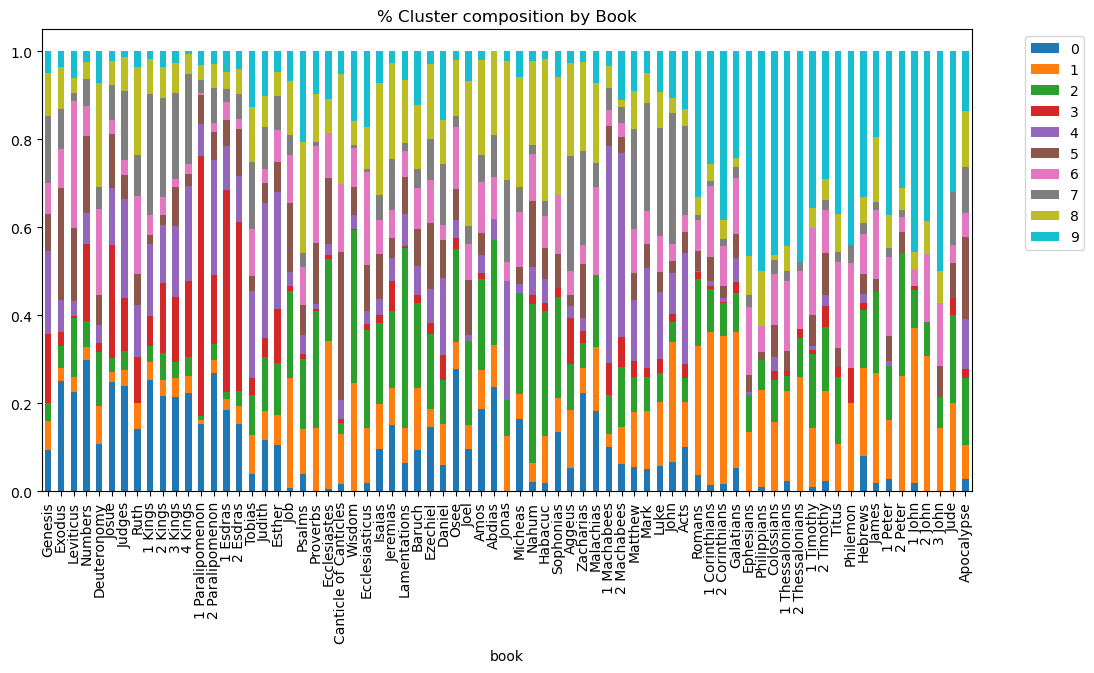